In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_log_error
from sklearn.feature_selection import mutual_info_regression, f_regression, SelectKBest

from sklearn.preprocessing import LabelEncoder

from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
def loadDatasets():
    df1 = pd.read_csv('dados/train.csv').set_index('Id')
    df2 = pd.read_csv('dados/test.csv').set_index('Id')
    return df1, df2

In [3]:
dfTrainRaw, dfTestRaw = loadDatasets()

In [4]:
dfTotal = pd.concat([dfTrainRaw, dfTestRaw])

In [5]:
def locateNAs(df):
    """
    This function helps you to find missing values within a dataframe no matter how many columns are on it\n
    df -> Should be a pandas dataframe
    """
    mem = df.isna().sum()
    nas = [col for col in mem.index if mem.loc[col]>0]
    return nas

In [6]:
def cleanCatVars(df):
    df1 = df.copy()
    catVarToDrop = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature']
    df1.drop(catVarToDrop, axis = 1, inplace=True)
    encoders = []
    i = 0
    dfCatEncoded = pd.DataFrame()
    for label in df1:
        encoders.append(LabelEncoder())
        dfCatEncoded[label] = encoders[i].fit_transform(df1[label])
        i+=1
    dfCatEncoded.index = df1.index
    return dfCatEncoded

In [7]:
def cleanNum(df):
    numVarsToDrop = ['GarageYrBlt','GarageCars']
    dfNum = df.drop(numVarsToDrop, axis = 1)
    return dfNum

In [8]:
nasTrain = locateNAs(dfTrainRaw)
nasTest = locateNAs(dfTestRaw)

array([[<AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>],
       [<AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>],
       [<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>],
       [<AxesSubplot:title={'center':'Ful

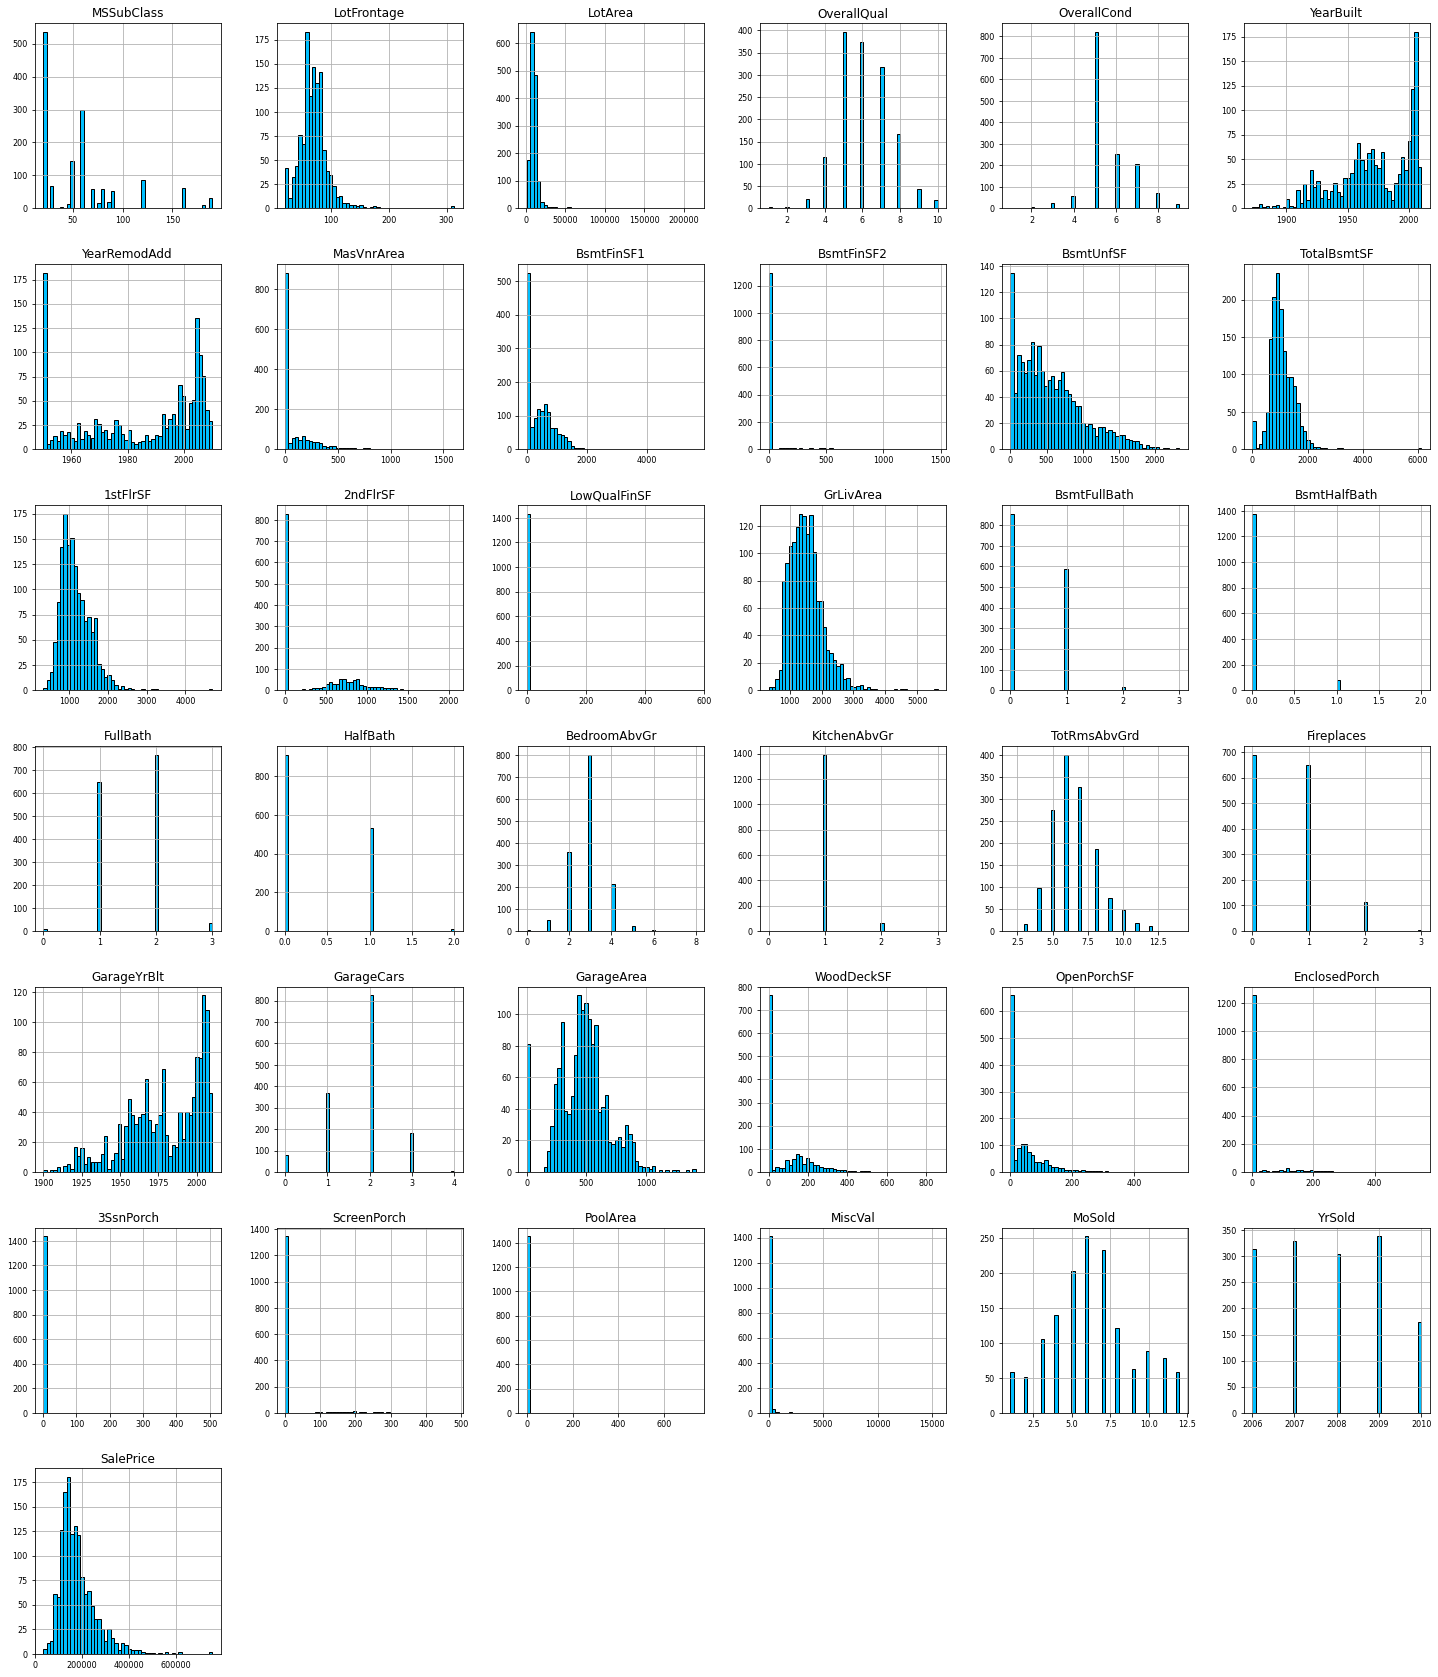

In [9]:
dfTrainRaw.select_dtypes(exclude='object').hist(figsize=(25, 30), bins=50, color="deepskyblue",
                           edgecolor="black", xlabelsize=8, ylabelsize=8)

In [10]:
dfTrainRaw.select_dtypes(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal


In [11]:
columnCategorical = [col for col in dfTrainRaw.select_dtypes(include='object')]
columnNumerical = [col for col in dfTrainRaw.select_dtypes(exclude='object')]

In [12]:
dfCategorical = cleanCatVars(dfTrainRaw[columnCategorical])
dfNumerical = cleanNum(dfTrainRaw[columnNumerical])
dfNumerical.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [13]:
dfCat = cleanCatVars(dfTotal[columnCategorical])
dfNum = cleanNum(dfTotal[columnNumerical])

In [14]:
dfTestRaw.index

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

In [15]:
dfCatTrain = dfCat.loc[dfTrainRaw.index]
dfNumTrain = dfNum.loc[dfTrainRaw.index]
dfCatTest = dfCat.loc[dfTestRaw.index]
dfNumTest = dfNum.loc[dfTestRaw.index]

In [16]:
dfCatTrain.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
2,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
3,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
4,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
5,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4


<AxesSubplot:ylabel='Frequency'>

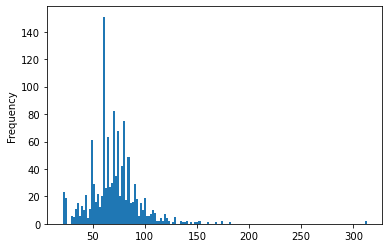

In [17]:
dfNumTrain['LotFrontage'].plot.hist(bins=150)

In [21]:
dfNumTrain.isna().sum()
dfNumTest.isna().sum()

MSSubClass          0
LotFrontage       227
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         15
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

In [22]:
imputer = SimpleImputer(strategy='median')
dfNumTrain['LotFrontage'] = imputer.fit_transform(dfNumTrain['LotFrontage'].values.reshape(-1,1))
dfNumTrain['MasVnrArea'] = imputer.fit_transform(dfNumTrain['MasVnrArea'].values.reshape(-1,1))

dfNumTest['LotFrontage'] = imputer.fit_transform(dfNumTest['LotFrontage'].values.reshape(-1,1))
dfNumTest['MasVnrArea'] = imputer.fit_transform(dfNumTest['MasVnrArea'].values.reshape(-1,1))
dfNumTest['BsmtFinSF1'] = imputer.fit_transform(dfNumTest['BsmtFinSF1'].values.reshape(-1,1))
dfNumTest['BsmtFinSF2'] = imputer.fit_transform(dfNumTest['BsmtFinSF2'].values.reshape(-1,1))
dfNumTest['BsmtFinSF2'] = imputer.fit_transform(dfNumTest['BsmtFinSF2'].values.reshape(-1,1))
dfNumTest['BsmtUnfSF'] = imputer.fit_transform(dfNumTest['BsmtUnfSF'].values.reshape(-1,1))
dfNumTest['TotalBsmtSF'] = imputer.fit_transform(dfNumTest['TotalBsmtSF'].values.reshape(-1,1))
dfNumTest['BsmtFullBath'] = imputer.fit_transform(dfNumTest['BsmtFullBath'].values.reshape(-1,1))
dfNumTest['BsmtHalfBath'] = imputer.fit_transform(dfNumTest['BsmtHalfBath'].values.reshape(-1,1))
dfNumTest['GarageArea'] = imputer.fit_transform(dfNumTest['GarageArea'].values.reshape(-1,1))



In [ ]:
corr = dfNumTrain.corr()
plt.figure(figsize = (25,25))
sns.heatmap(corr, cmap = 'viridis',annot=True)
plt.show()

In [23]:
dfTrainFirst = pd.merge(dfNumTrain,dfCatTrain, on= 'Id', how = 'inner')
dfTestFirst = pd.merge(dfNumTest,dfCatTest, on= 'Id', how = 'inner')
dfTrainFirst['SalePrice'] = dfTrainRaw['SalePrice']
dfTrainFirst.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,4,2,6,1,1,4,4,2,8,4
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,4,3,6,1,1,4,4,2,8,4
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,4,2,6,1,1,4,4,2,8,4
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,4,2,6,5,2,4,4,2,8,0
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,4,2,6,1,1,4,4,2,8,4


In [24]:
X = dfTrainFirst.drop('SalePrice', axis  =1)
y = dfTrainFirst['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=0)

baseModel = RandomForestRegressor(n_estimators=100, random_state=0)

baseModel.fit(X_train,y_train)

pred = baseModel.predict(X_test)

baseMAE = mean_absolute_error(y_test,pred)
baseRMSLE = np.sqrt(mean_squared_log_error(y_test,pred))

print('Basic MAE = ', baseMAE)
print('Basic RMSLE = ', baseRMSLE)

Basic MAE =  17086.939771784233
Basic RMSLE =  0.13331260262807287


In [ ]:
params = {'max_depth': [10, 20, 30, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200]}
grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params,n_jobs=-1,cv = 5,
                   scoring='neg_mean_absolute_error')

grid.fit(X,y)
grid.best_estimator_

In [ ]:
params = {'max_depth': [40,50,60,None],
 'n_estimators': [200,300,400,600]}
grid = GridSearchCV(estimator=RandomForestRegressor(),param_grid=params,n_jobs=-1,cv = 5,
                   scoring='neg_mean_absolute_error')
grid.fit(X,y)
grid.best_estimator_

In [25]:
max_depth = 40
n_estimators = 400
max_features = 'sqrt'
min_samples_leaf = 1
min_samples_split = 2

X = dfTrainFirst.drop('SalePrice', axis  =1)
y = dfTrainFirst['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.33, random_state=0)

model = RandomForestRegressor(n_estimators=400, max_depth=40, max_features='sqrt', min_samples_leaf=1,
                             min_samples_split=2)
model.fit(X_train, y_train)

pred = model.predict(X_valid)
mae = mean_absolute_error(y_valid,pred)
rmsle = np.sqrt(mean_squared_log_error(y_valid,pred))

print('MAE = ', mae)
print('RMSLE = ', rmsle)

MAE =  16647.95479771784
RMSLE =  0.1325811499309307


In [ ]:
X.columns

In [ ]:
mi = mutual_info_regression(X, y)
dfMI = pd.DataFrame({'Columns':X.columns,'mi':mi})
dfMI.sort_values('mi', ascending=False).tail(8)

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.33, random_state=0)

model = RandomForestRegressor(n_estimators=400, max_depth=40, max_features='sqrt', min_samples_leaf=1,
                             min_samples_split=2)
model.fit(X_train, y_train)

pred = model.predict(X_valid)
mae = mean_absolute_error(y_valid,pred)
rmsle = np.sqrt(mean_squared_log_error(y_valid,pred))

print('MAE = ', mae)
print('RMSLE = ', rmsle)

MAE =  16744.5817219917
RMSLE =  0.13308266609532377


In [ ]:
X.columns

In [27]:
dfTrainFirst['TotalArea'] = dfTrainFirst['1stFlrSF'] + dfTrainFirst['2ndFlrSF']
dfTrainFirst['QualAreaFactor'] = (dfTrainFirst["TotalArea"] * dfTrainFirst['OverallQual'] * dfTrainFirst['OverallCond'])

dfTestFirst['TotalArea'] = dfTestFirst['1stFlrSF'] + dfTestFirst['2ndFlrSF']
dfTestFirst['QualAreaFactor'] = (dfTestFirst["TotalArea"] * dfTestFirst['OverallQual'] * dfTestFirst['OverallCond'])

In [28]:
X = dfTrainFirst.drop('SalePrice', axis  =1)
y = dfTrainFirst['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.33, random_state=0)

model = RandomForestRegressor(n_estimators=400, max_depth=40, max_features='sqrt', min_samples_leaf=1,
                             min_samples_split=2, random_state=0)
model.fit(X_train, y_train)

pred = model.predict(X_valid)
mae = mean_absolute_error(y_valid,pred)
rmsle = np.sqrt(mean_squared_log_error(y_valid,pred))

print('MAE = ', mae)
print('RMSLE = ', rmsle)

MAE =  16208.55153526971
RMSLE =  0.12958666805459332


In [29]:
dfFeatureImp = pd.DataFrame({'Names':X_train.columns, 'Imp':model.feature_importances_})
dfFeatureImp.sort_values('Imp',ascending=False)

,Names,Imp
73,QualAreaFactor,0.120312
3,OverallQual,0.094568
72,TotalArea,0.072812
15,GrLivArea,0.064805
5,YearBuilt,0.057068
...,...,...
31,MiscVal,0.000235
28,3SsnPorch,0.000208
30,PoolArea,0.000067
35,Street,0.000066


In [30]:
dfTrainSecond = dfTrainFirst.drop(['3SsnPorch','MiscVal','PoolArea','Heating'], axis =1)
dfTestSecond = dfTestFirst.drop(['3SsnPorch','MiscVal','PoolArea','Heating'], axis =1)

In [31]:
X = dfTrainSecond.drop('SalePrice', axis = 1)
y = dfTrainSecond['SalePrice']

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.33, random_state=0)

model = RandomForestRegressor(n_estimators=400, max_depth=40, max_features='sqrt', min_samples_leaf=1,
                             min_samples_split=2, random_state=0)
model.fit(X_train, y_train)

pred = model.predict(X_valid)
mae = mean_absolute_error(y_valid,pred)
rmsle = np.sqrt(mean_squared_log_error(y_valid,pred))

print('MAE = ', mae)
print('RMSLE = ', rmsle)

MAE =  16357.549522821577
RMSLE =  0.13085235094663603


In [32]:
dfTestSecond.isna().sum().sort_values()

MSSubClass           0
ExterCond            0
ExterQual            0
MasVnrType           0
Exterior2nd          0
                  ... 
BedroomAbvGr         0
HalfBath             0
WoodDeckSF           0
QualAreaFactor       0
SalePrice         1459
Length: 71, dtype: int64

In [38]:
X = dfTrainSecond.drop('SalePrice', axis = 1)
y = dfTrainSecond['SalePrice']
modelFinal = RandomForestRegressor(n_estimators=400, max_depth=40, max_features='sqrt', min_samples_leaf=1,
                             min_samples_split=2, random_state=0)

modelFinal.fit(X,y)
X1 = dfTestSecond.drop('SalePrice', axis =1)
pred = modelFinal.predict(X1)

dfFinal = pd.DataFrame({"Id":dfTestSecond.index, "SalePrice":pred}).set_index('Id')

In [39]:
dfFinal.to_csv('submission.csv', sep = ',')